In [22]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
import sys
sys.path.append('../python/')
import gis_functions as gf
import lem
import pandas as pd
from gis_functions import generate_pour_point_catchment
from shapely.geometry import shape
from rasterio.features import shapes
import geopandas as gpd
%load_ext autoreload
%autoreload 2

In [23]:
pt = [-43.88, 169.9]


[423, 447]
500 500
(423, 447)
Boundary condition values have been reset
12
[423, 447]
500 500
(423, 447)
Boundary condition values have been reset
dx=-29.450328652720888
Filling DEM
[423, 447]
423 447
(423, 447)
817
-43.88
-43.912660443964015
here
15857.534802438566
here
20262.405580893723
here
20262.405580893723
here
22905.328047966817
here
55501.37180853498
here
5341346.305954724


<Axes: >

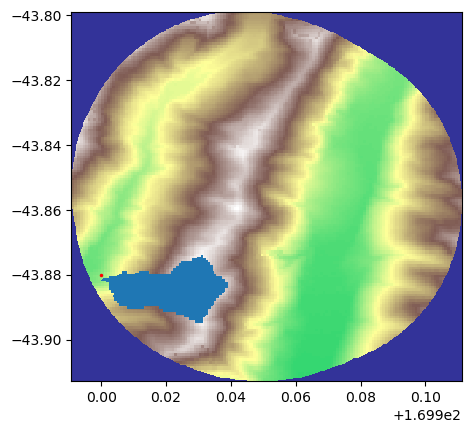

In [41]:
filenm = '../example_data/nz_dems/nz_bas_hydroshed_0_.tif'
outnm = '../example_data/out/nz_0_clipped'
fig,ax = plt.subplots(1,1)
f = rio.open(filenm) #File containing DEM
Z=np.float64(np.squeeze(f.read()))
m,n = np.shape(Z)
lat = np.array([f.xy(i,0)[1] for i in range(m)])
lon = np.array([f.xy(0,i)[0] for i in range(n)])
plt.pcolormesh(lon,lat,Z,cmap='terrain')
dem=lem.simple_model()
Z[Z<=0]=np.nan
dem.set_z(Z)
dem.sinkfill()
dem.slp()
dem.acc()
A = dem.A
athres = 100 #threshold drainage area for plotting
IJ = np.where((A>athres) & (Z>=1))
plt.plot(lon[IJ[1]],lat[IJ[0]],'.k',markersize=.1)
plt.plot(pt[1],pt[0],'.r',markersize=3)
df,_ = generate_pour_point_catchment(filenm, outnm, pt, fillsink=True, target_area=1e5, search_area=.05, flowdir=None)
df.plot(ax=ax)


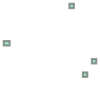

In [40]:
df.iloc[0].geometry

In [27]:
# Format flow dir raster -
# raster is in relative direction format 1 = E, 2 = SE, 4=S, 8=SW, 16 = W, 32 =NW, 64 =N, 128 = NE
# We must revise it so that it is in the format of the receiver grid - absolute (row major) location

R = rio.open('/users/gr_1/Downloads/clipped_flow.tif')
flowdir = np.squeeze(R.read())
ny,nx = np.shape(flowdir)
flowdir_revised = np.zeros((ny,nx))
flowdir_revised[flowdir==1]=ny
flowdir_revised[flowdir==2]=ny+1
flowdir_revised[flowdir==4]=1
flowdir_revised[flowdir==8]=-ny+1
flowdir_revised[flowdir==16]=-ny
flowdir_revised[flowdir==32]=-ny-1
flowdir_revised[flowdir==64]=-1
flowdir_revised[flowdir==128]=ny-1
add_vec = np.arange(ny*nx).reshape(ny,nx,order='F')
flowdir_revised+=add_vec
flowdir_revised[flowdir_revised<0]=0
flowdir_revised[0,:]=add_vec[0,:]
flowdir_revised[-1,:]=add_vec[-1,:]
flowdir_revised[:,0]=add_vec[:,0]
flowdir_revised[:,-1]=add_vec[:,-1]
flowdir_revised=np.int64(flowdir_revised)

In [24]:
filenm = '/Users/gr_1/Downloads/clipped_dem.tif'
outnm =  '/Users/gr_1/Downloads/out_aus' #output for DEM
pt = [-23.986083, 134.7173]
df,A=generate_pour_point_catchment(filenm, outnm, pt,
                                   fillsink=False,
                                   target_area = 1e8,
                                   search_area =.05,flowdir=flowdir_revised)


NameError: name 'flowdir_revised' is not defined

<Axes: >

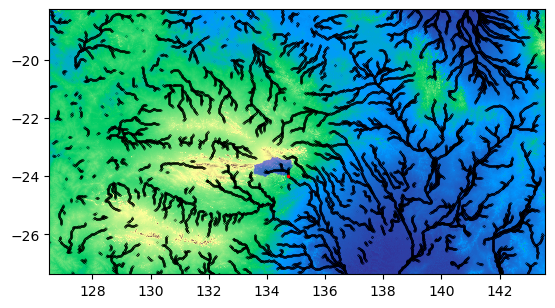

In [13]:
fig,ax = plt.subplots(1,1)
f = rio.open(filenm) #File containing DEM
Z=np.float64(np.squeeze(f.read()))
m,n = np.shape(Z)
lat = np.array([f.xy(i,0)[1] for i in range(m)])
lon = np.array([f.xy(0,i)[0] for i in range(n)])
plt.pcolormesh(lon,lat,Z,cmap='terrain')
athres = 10000 #threshold drainage area for plotting
IJ = np.where((A>athres) & (Z>=1))
plt.plot(lon[IJ[1]],lat[IJ[0]],'.k',markersize=.1)
plt.plot(pt[1],pt[0],'.r',markersize=3)
df.plot(ax=ax,color='blue',alpha=.5)



In [32]:
pts.iloc[100:103]

OBSID1   OBSID2 STUDYID                   geometry
100  S069WTS022   Novate    S069   POINT (9.45954 46.41203)
101  S069WTS023    Oglio    S069  POINT (10.34916 46.35119)
102  S069WTS024  Pfitsch    S069  POINT (11.47359 47.09398)

In [66]:
shps.iloc[101].geometry.bounds

(97.33914413779921, 39.49293985728793, 97.57081572040957, 39.87183086758495)

In [116]:
pts.iloc[615]

OBSID1                                        S095WTS006
OBSID2                                          QS-JG-43
STUDYID                                             S095
geometry    POINT (99.27335274048113 39.016331511204974)
Name: 615, dtype: object

x## Global

In [106]:
i=15
filenm = f'../data_earth_engine/nz_bas_hydroshed_{i}_.tif' #input file name for DEM
outnm = f'../data_earth_engine/nz_bas_hydroshed_{i}_output' #output for DEM
ptfile = './octo_points'
shpfile = '../Archive/crn_int_basins_071625'

if 0:
        pts = gpd.read_file(ptfile)
        pts=pts.to_crs('epsg:4326')
if 0:
        shps = gpd.read_file(shpfile)
        shps=shps.to_crs('epsg:4326')
xy =[pts.iloc[i].geometry.xy[0][0],pts.iloc[i].geometry.xy[1][0]]



In [113]:
pts.iloc[13:17]

OBSID1   OBSID2 STUDYID                     geometry
13  S076WTS001    Arr_2    S076    POINT (84.97039 27.96629)
14  S274WTS016  16PH005    S274  POINT (-145.73919 63.50637)
15  S082WTS015   Boo-M3    S082  POINT (-66.04359 -26.77025)
16  S086WTS004   NEP065    S086    POINT (84.42983 28.14677)

[547, 511]
500 500
(547, 511)
Boundary condition values have been reset
dx=26.7077215895671
Filling DEM
[547, 511]
547 511
(547, 511)
1074
-66.0435878636774
38.919734263299304


ValueError: zero-size array to reduction operation maximum which has no identity

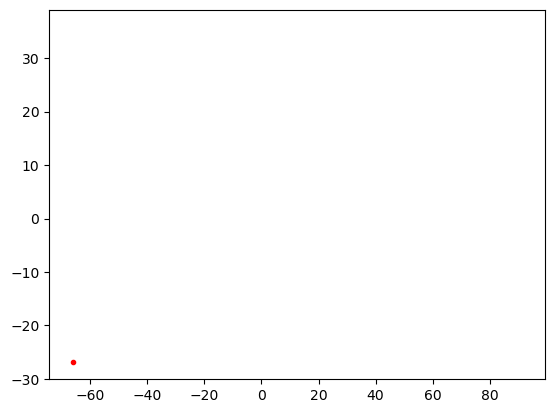

In [109]:
df,A=generate_pour_point_catchment(filenm, outnm, xy, target_area = 10, search_area =.01)

In [6]:
import jupydebug as jdb

In [95]:

frames2 = jdb.post_mortem()

In [96]:
acc = frames2[3].locals['acc']

In [97]:
w = frames2[3].locals['w']
y = frames2[3].locals['y']
x = y = frames2[3].locals['x']

In [98]:
acc[y-w:y+w+1,x-w:x+w+1]

np.shape(acc)

(747, 922)

In [110]:
xy

[-66.0435878636774, -26.770249953266188]

In [78]:
ny, nx = np.where(acc[y-w:y+w+1,x-w:x+w+1]>= np.max(acc[y-w:y+w+1,x-w:x+w+1])/1.25)

ValueError: zero-size array to reduction operation maximum which has no identity

In [12]:
frames2[3][

AttributeError: 'Frame' object has no attribute 'acc'

In [125]:
m,n = np.shape(Z)
x,y = np.meshgrid(np.arange(n),np.arange(m))

In [126]:
nans = np.isnan(Z.ravel())

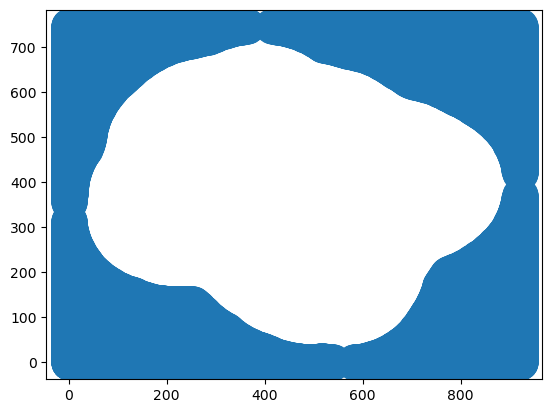

In [96]:
plt.plot(x.ravel()[nans],y.ravel()[nans],'.',markersize=50)